# Laboratorio 8 - Data Science

Integrantes:
- Oscar López (20679)
- Rodrigo Barrera (20807)

## Exploración de Datos

<ipython-input-9-f7e345ef7d25>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


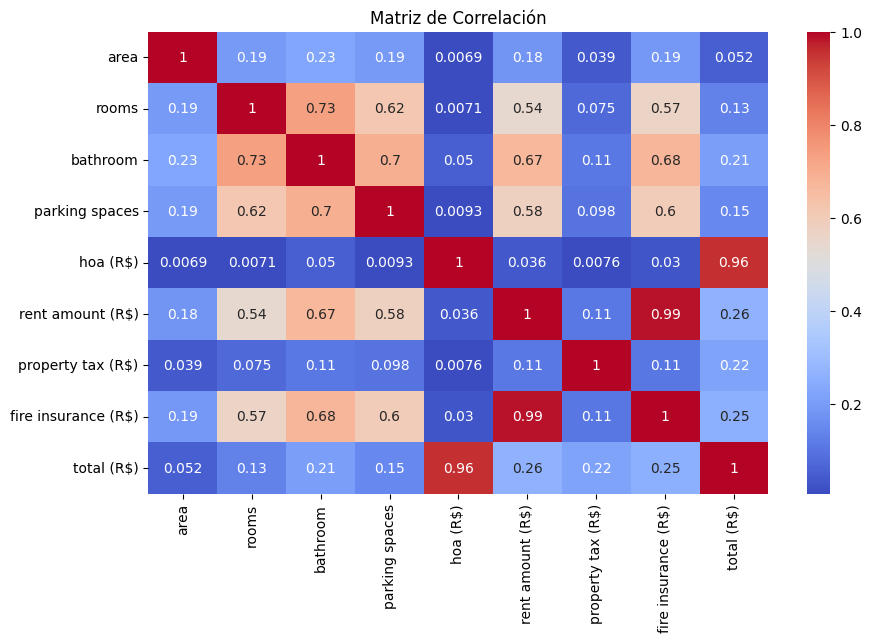

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Carga de datos
df = pd.read_csv("data/houses_to_rent_v2.csv")

# Visualización de la matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [10]:
df.shape

(10692, 13)

In [11]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [12]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bathroom'}>],
       [<Axes: title={'center': 'parking spaces'}>,
        <Axes: title={'center': 'hoa (R$)'}>,
        <Axes: title={'center': 'rent amount (R$)'}>],
       [<Axes: title={'center': 'property tax (R$)'}>,
        <Axes: title={'center': 'fire insurance (R$)'}>,
        <Axes: title={'center': 'total (R$)'}>]], dtype=object)

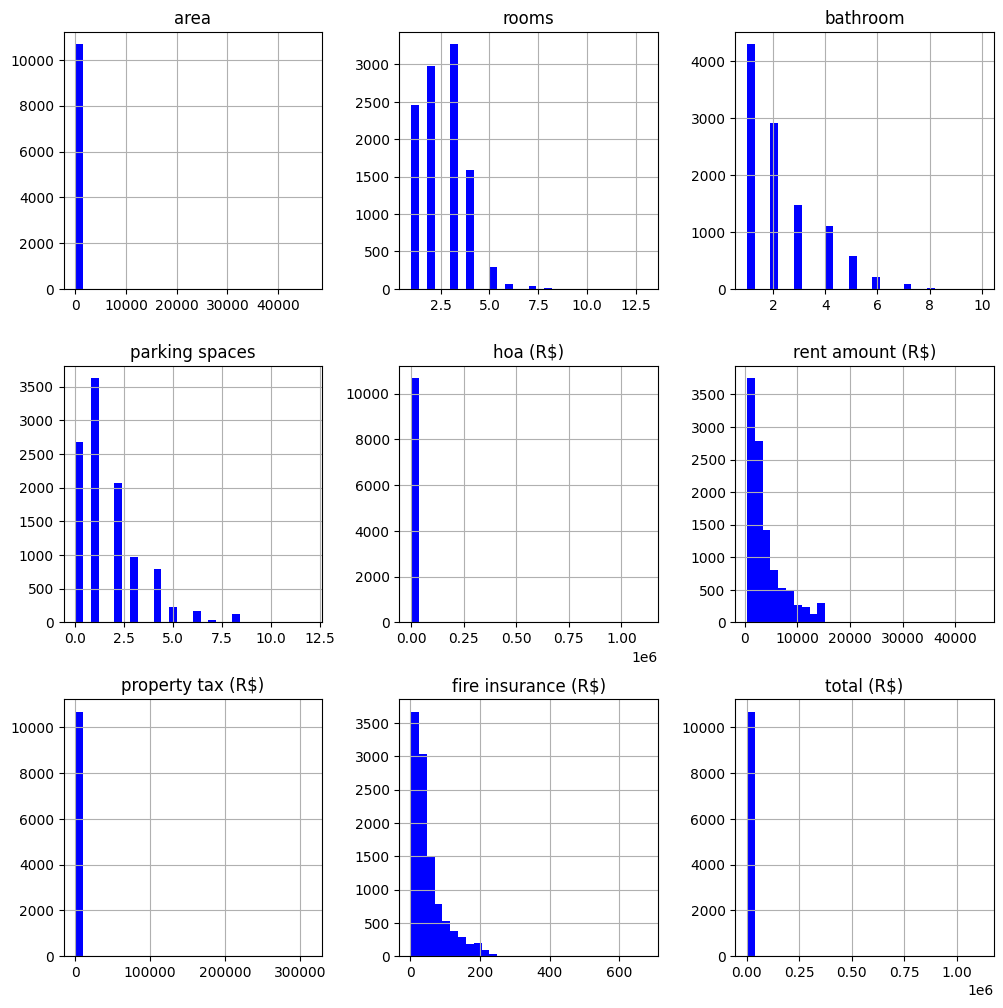

In [13]:
df[df.columns].hist(bins=30, figsize=(12, 12), color="b")

## Preprocesamiento de Datos

In [14]:
# Tratar valores faltantes
df = df.dropna()

label_encoder = LabelEncoder()

categoricas = ["city", "floor", "animal", "furniture"]

for column in categoricas:
    df[column] = label_encoder.fit_transform(df[column])

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,32,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,13,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,31,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2,63,2,1,1,29,1,0,402,1478,24,22,1926
10688,4,285,4,4,4,9,0,1,3100,15000,973,191,19260
10689,3,70,3,3,0,33,1,0,980,6000,332,78,7390
10690,3,120,2,2,2,33,0,0,1585,12000,279,155,14020


##  División de Datos

In [15]:
X = df.drop("rent amount (R$)", axis=1)  # Variables predictoras
y = df["rent amount (R$)"]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,32,0,0,2065,211,42,5618
1,4,320,4,4,0,13,0,1,1200,1750,63,7973
2,2,80,1,1,1,31,0,1,1000,0,41,3841
3,2,51,2,1,0,12,0,1,270,22,17,1421
4,4,25,1,1,0,1,1,1,0,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2,63,2,1,1,29,1,0,402,24,22,1926
10688,4,285,4,4,4,9,0,1,3100,973,191,19260
10689,3,70,3,3,0,33,1,0,980,332,78,7390
10690,3,120,2,2,2,33,0,0,1585,279,155,14020


In [17]:
y

0         3300
1         4960
2         2800
3         1112
4          800
         ...  
10687     1478
10688    15000
10689     6000
10690    12000
10691     1400
Name: rent amount (R$), Length: 10692, dtype: int64

In [18]:
X_train

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),total (R$)
6239,4,200,3,4,3,11,0,0,2247,1000,33,11780
9805,4,225,3,2,2,0,0,1,0,209,35,2544
10314,1,53,1,1,0,31,0,1,403,15,7,925
10072,2,42,1,1,1,1,0,0,650,81,36,3167
3026,4,101,2,2,1,4,0,1,582,0,22,2304
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,4,17,1,1,0,1,1,0,300,50,27,2477
5191,4,104,3,2,2,1,1,1,1040,0,49,4889
5390,3,100,2,2,0,3,0,0,670,375,61,5806
860,4,53,1,1,1,29,1,0,1132,0,33,3765


In [19]:
X_test

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),total (R$)
1964,1,134,3,3,2,32,1,1,1000,177,32,3709
5267,3,80,2,1,1,2,1,1,660,50,25,2635
9630,1,80,2,2,1,33,0,0,860,34,26,2920
5503,0,90,3,2,1,12,0,1,200,111,19,1730
1683,4,300,4,2,0,29,0,1,6000,834,191,22030
...,...,...,...,...,...,...,...,...,...,...,...,...
1103,4,330,5,4,4,0,0,1,0,192,70,4862
10165,2,100,3,1,1,23,0,1,580,69,19,1908
4845,1,80,2,1,1,31,1,1,498,75,13,1586
5603,2,114,3,2,1,12,0,0,750,109,43,3802


In [20]:
y_train

6239     8500
9805     2300
10314     500
10072    2400
3026     1700
         ... 
5734     2100
5191     3800
5390     4700
860      2600
7270     2700
Name: rent amount (R$), Length: 8553, dtype: int64

In [21]:
y_test

1964      2500
5267      1900
9630      2000
5503      1400
1683     15000
         ...  
1103      4600
10165     1240
4845      1000
5603      2900
3457       900
Name: rent amount (R$), Length: 2139, dtype: int64

## Entrenamiento y Evaluación de Modelos

In [22]:
# Inicializar modelos
model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_svr = SVR()

# Entrenar modelos
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svr.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svr = model_svr.predict(X_test)

# Calcular RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("RMSE Regresión Lineal:", rmse_lr)
print("RMSE Regresión de Bosque Aleatorio:", rmse_rf)
print("RMSE SVR:", rmse_svr)

RMSE Regresión Lineal: 1.0502592371831507
RMSE Regresión de Bosque Aleatorio: 220.64543706184628
RMSE SVR: 3236.2106994463334
